# Info 370: PS6-Classification

*Name:* Zhi Ye

### Note:

The values that I computed are based on the time that I ran my code.

In [433]:
# Import packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### 1 Explore the Data

In [434]:
# 1.1 
# Loading the wbdc csv
# As stated in the instructions, I'll be dropping "id" in the rest of my analysis
wdbc = pd.read_csv('/Users/ZhiYe/Documents/info370/wdbc.csv.bz2').drop('id', axis=1)

In [435]:
# 1.1
# Converting diagnosis into a numerical variable
wdbc.diagnosis = (wdbc.diagnosis == "M").astype(int)

In [436]:
# 1.1
# Viewing the number of rows and columns of wdbc
wdbc.shape

(569, 31)

In [437]:
# 1.1 
# Performing sanity check for the wwbdc data and viewing the first 20 rows
wdbc.head(20)

,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [438]:
# 1.2
# Creating a dataframe summary table that includes mean, min, max, range, standard deviation (std),
# and missing values
mean_and_such = wdbc.apply(lambda col: pd.Series({'Mean': col.mean(),'Min': col.min(),
                                      'Max': col.max(), 'Range': col.max() - col.min(),
                                      'STD': col.std(), 'Missings': col.isnull().sum() })).T
mas = pd.DataFrame(mean_and_such)

In [439]:
# 1.2
# Creating a dataframe summary table for correlation
corr = wdbc.corrwith(wdbc['diagnosis'])
corr_df = pd.DataFrame(corr) 
corr_df.columns = ['Correlation']

In [440]:
# 1.2
# Concatenating correlation dataframe summary table with mean and such dataframe summary table
# and calling it corr_and_mas 
corr_and_mas = pd.concat([corr_df, mas], axis=1)

In [441]:
# 1.2
# Sorting corr_and_mas dataframe summary table by absolute value of correlation and viewing it.
sorted_df = corr_and_mas.reindex(corr_and_mas.Correlation.abs().sort_values().index)
sorted_df = sorted_df.iloc[::-1]
sorted_df

,Correlation,Mean,Min,Max,Range,STD,Missings
diagnosis,1.000000,0.372583,0.000000,1.00000,1.000000,0.483918,0.0
concpoints.worst,0.793566,0.114606,0.000000,0.29100,0.291000,0.065732,0.0
perimeter.worst,0.782914,107.261213,50.410000,251.20000,200.790000,33.602542,0.0
concpoints.mean,0.776614,0.048919,0.000000,0.20120,0.201200,0.038803,0.0
radius.worst,0.776454,16.269190,7.930000,36.04000,28.110000,4.833242,0.0
perimeter.mean,0.742636,91.969033,43.790000,188.50000,144.710000,24.298981,0.0
area.worst,0.733825,880.583128,185.200000,4254.00000,4068.800000,569.356993,0.0
radius.mean,0.730029,14.127292,6.981000,28.11000,21.129000,3.524049,0.0
area.mean,0.708984,654.889104,143.500000,2501.00000,2357.500000,351.914129,0.0
concavity.mean,0.696360,0.088799,0.000000,0.42680,0.426800,0.079720,0.0


### 2 Which Model is Best

In [442]:
# 2.1
# Extracting diagnosis, concpoints.mean, and fracdim.mean and splitting result into training and validation chunks
X = wdbc[['concpoints.mean', 'fracdim.mean']]
y = wdbc['diagnosis']
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2)

In [449]:
# 2.2
# Fitting the model on training data
m = LogisticRegression(solver='lbfgs', C=1e9).fit(Xtrain, ytrain)

In [450]:
# 2.3
# Predicting the outcome on training data
yhat1 = m.predict(Xtrain)
yhat1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,

In [451]:
# 2.3
# Creating a confusion matrix
cm1 = pd.crosstab(ytrain, yhat1)
cm1

col_0,0,1
diagnosis,,
0,271,14
1,20,150


In [453]:
# 2.4
# Calculating accuracy
a1 = (150 + 271)/455
print('Accuracy:', a1)

Accuracy: 0.9252747252747253


In [454]:
# 2.4
# Calculating precision, which is needed to calculate F-score
p1 = 150/(150 + 14)
print('Precision:', p1)

Precision: 0.9146341463414634


In [455]:
# 2.4
# Calculating recall, which is needed to calculate F-score
r1 = 150/(150 + 20)
print('Recall:', r1)

Recall: 0.8823529411764706


In [458]:
# 2.4
# Calculating F-score
fs1 = 2/((1/p1) + (1/r1))
print('F-score:', fs1)

F-score: 0.8982035928143713


In [459]:
# 2.5
# Predicting the outcome on validation data
yhat2 = m.predict(Xvalid)
yhat2

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0])

In [460]:
# 2.5
# Creating a confusion matrix of the result on validation data
cm2 = pd.crosstab(yvalid, yhat2)
cm2

col_0,0,1
diagnosis,,
0,62,10
1,5,37


In [462]:
# 2.6
# Calculating accuracy on validation data
a2 = (37 + 62)/114
print('Accuracy:', a2)

Accuracy: 0.868421052631579


In [463]:
# 2.6
# Calculating precision on validation data, which is needed to calculate F-score
p2 = 37/(37 + 10)
print('Precision:', p2)

Precision: 0.7872340425531915


In [464]:
# 2.6
# Calculating recall on validation data, which is needed to calculate F-score
r2 = 37/(37 + 5)
print('Recall:', r2)

Recall: 0.8809523809523809


In [465]:
# 2.6
# Calculating F-score on validation data 
fs2 = 2/((1/p2) + (1/r2))
print('F-score:', fs2)

F-score: 0.8314606741573034


**2.7:**

The model performed better on training data than testing data because for training data, the accuracy was 0.9252747252747253 and the F-score was 0.8982035928143713 while for testing data, the acurracy was 0.868421052631579 and the F-score was 0.8314606741573034. Additionally, the model does hint about overfitting since the complexity improved training performance, the testing performance deteriorates, and the testing performance was worse than the training performance.

In [466]:
# 2.8 Additional Model 1
# Extracting diagnosis, compactness.mean, and radius.mean and splitting result into training and validation chunks
X3 = wdbc[['compactness.mean', 'radius.mean']]
y3 = wdbc['diagnosis']
Xtrain3, Xvalid3, ytrain3, yvalid3 = train_test_split(X3, y3, test_size=0.2)

In [467]:
# 2.8 Additional Model 1
# Fitting the model on training data
m3 = LogisticRegression(solver='lbfgs', C=1e9).fit(Xtrain3, ytrain3)

In [468]:
# 2.8 Additional Model 1
# Predicting the outcome on training data
yhat3 = m3.predict(Xtrain3)
yhat3

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,

In [469]:
# 2.8 Additional Model 1
# Creating a confusion matrix
cm3 = pd.crosstab(ytrain3, yhat3)
cm3

col_0,0,1
diagnosis,,
0,272,17
1,28,138


In [471]:
# 2.8 Additional Model 1
# Calculating accuracy on training data
at3 = (138 + 272)/455
print('Accuracy:', at3)

Accuracy: 0.9010989010989011


In [475]:
# 2.8 Additional Model 1
# Calculating precison on training data, which is needed to calculate F-score
pt3 = 138/(138 + 17)
print('Precision:', pt3)

Precision: 0.8903225806451613


In [476]:
# 2.8 Additional Model 1
# Calculating recall on training data, which is needed to calculate F-score
rt3 = 138/(138 + 28)
print('Recall:', rt3)

Recall: 0.8313253012048193


In [477]:
# 2.8 Additional Model 1
# Calculating F-score on training data
fst3 = 2/((1/pt3) + (1/rt3))
print('F-score:', fst3)

F-score: 0.8598130841121495


In [478]:
# 2.8 Additional Model 1
# Predicting the outcome on validation data
yhatv3 = m3.predict(Xvalid3)
yhatv3

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0])

In [479]:
# 2.8 Additional Model 1
# Creating a confusion matrix of the result on validation data
cmv3 = pd.crosstab(yvalid3, yhatv3)
cmv3

col_0,0,1
diagnosis,,
0,66,2
1,5,41


In [481]:
# 2.8 Additional Model 1
# Calculating accuracy on validation data
av3 = (41 + 66)/114
print('Accuracy:', av3)

Accuracy: 0.9385964912280702


In [482]:
# 2.8 Additional Model 1
# Calculating precision on validation data, which is needed to calculate F-score
pv3 = 41/(41 + 2)
print('Precision:', pv3)

Precision: 0.9534883720930233


In [483]:
# 2.8 Additional Model 1
# Calculating recall on validation data, which is needed to calculate F-score
rv3 = 41/(41 + 5)
print('Recall:', rv3)

Recall: 0.8913043478260869


In [484]:
# 2.8 Additional Model 1
# Calculating F-score on validation data 
fsv3 = 2/((1/pv3) + (1/rv3))
print('F-score:', fsv3)

F-score: 0.9213483146067415


In [485]:
# 2.8 Additional Model 2
# Extracting diagnosis, perimeter.mean, texture.se, and fracdim.worst
# and splitting result into training and validation chunks
X4 = wdbc[['perimeter.mean', 'texture.se', 'fracdim.worst']]
y4 = wdbc['diagnosis']
Xtrain4, Xvalid4, ytrain4, yvalid4 = train_test_split(X4, y4, test_size=0.2)

In [486]:
# 2.8 Additional Model 2
# Fitting the model on training data
m4 = LogisticRegression(solver='lbfgs', C=1e9).fit(Xtrain4, ytrain4)

In [487]:
# 2.8 Additional Model 2
# Predicting the outcome on training data
yhat4 = m4.predict(Xtrain4)
yhat4

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [488]:
# 2.8 Additional Model 2
# Creating a confusion matrix
cm4 = pd.crosstab(ytrain4, yhat4)
cm4

col_0,0,1
diagnosis,,
0,277,14
1,23,141


In [490]:
# 2.8 Additional Model 2
# Calculating accuracy on training data
at4 = (141 + 277)/455
print('Accuracy:', at4)

Accuracy: 0.9186813186813186


In [494]:
# 2.8 Additional Model 2
# Calculating precison on training data, which is needed to calculate F-score
pt4 = 141/(141 + 14)
print('Precision:', pt4)

Precision: 0.9096774193548387


In [495]:
# 2.8 Additional Model 2
# Calculating recall on training data, which is needed to calculate F-score
rt4 = 141/(141 + 23)
print('Recall:', rt4)

Recall: 0.8597560975609756


In [496]:
# 2.8 Additional Model 2
# Calculating F-score on training data
fst4 = 2/((1/pt4) + (1/rt4))
print('F-score:', fst4)

F-score: 0.884012539184953


In [497]:
# 2.8 Additional Model 2
# Predicting the outcome on validation data
yhatv4 = m4.predict(Xvalid4)
yhatv4

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1])

In [498]:
# 2.8 Additional Model 2
# Creating a confusion matrix of the result on validation data
cmv4 = pd.crosstab(yvalid4, yhatv4)
cmv4

col_0,0,1
diagnosis,,
0,64,2
1,5,43


In [521]:
# 2.8 Additional Model 2
# Calculating accuracy on validation data
av4 = (43 + 64)/114
print('Accuracy:', av4)

Accuracy: 0.9385964912280702


In [501]:
# 2.8 Additional Model 2
# Calculating precision on validation data, which is needed to calculate F-score
pv4 = 43/(43 + 2)
print('Precision:', pv4)

Precision: 0.9555555555555556


In [502]:
# 2.8 Additional Model 2
# Calculating recall on validation data, which is needed to calculate F-score
rv4 = 43/(43 + 5)
print('Recall:', rv4)

Recall: 0.8958333333333334


In [503]:
# 2.8 Additional Model 2
# Calculating F-score on validation data 
fsv4 = 2/((1/pv4) + (1/rv4))
print('F-score:', fsv4)

F-score: 0.924731182795699


In [504]:
# 2.8 Additional Model 3
# Extracting diagnosis, concavity.mean, texture.mean, fracdim.worst, and area.se
# and splitting result into training and validation chunks
X5 = wdbc[['concavity.mean', 'texture.mean', 'fracdim.worst', 'area.se']]
y5 = wdbc['diagnosis']
Xtrain5, Xvalid5, ytrain5, yvalid5 = train_test_split(X5, y5, test_size=0.2)

In [505]:
# 2.8 Additional Model 3
# Fitting the model on training data
m5 = LogisticRegression(solver='lbfgs', C=1e9).fit(Xtrain5, ytrain5)

In [506]:
# 2.8 Additional Model 3
# Predicting the outcome on training data
yhat5 = m5.predict(Xtrain5)
yhat5

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,

In [507]:
# 2.8 Additional Model 3
# Creating a confusion matrix
cm5 = pd.crosstab(ytrain5, yhat5)
cm5

col_0,0,1
diagnosis,,
0,274,13
1,22,146


In [509]:
# 2.8 Additional Model 3
# Calculating accuracy on training data
at5 = (146 + 274)/455
print('Accuracy:', at5)

Accuracy: 0.9230769230769231


In [511]:
# 2.8 Additional Model 3
# Calculating precison on training data, which is needed to calculate F-score
pt5 = 146/(146 + 13)
print('Precision:', pt5)

Precision: 0.9182389937106918


In [512]:
# 2.8 Additional Model 3
# Calculating recall on training data, which is needed to calculate F-score
rt5 = 146/(146 + 22)
print('Recall:', rt5)

Recall: 0.8690476190476191


In [513]:
# 2.8 Additional Model 3
# Calculating F-score on training data
fst5 = 2/((1/pt5) + (1/rt5))
print('F-score:', fst5)

F-score: 0.8929663608562691


In [514]:
# 2.8 Additional Model 3
# Predicting the outcome on validation data
yhatv5 = m5.predict(Xvalid5)
yhatv5

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [515]:
# 2.8 Additional Model 3
# Creating a confusion matrix of the result on validation data
cmv5 = pd.crosstab(yvalid5, yhatv5)
cmv5

col_0,0,1
diagnosis,,
0,67,3
1,9,35


In [517]:
# 2.8 Additional Model 3
# Calculating accuracy on validation data
av5 = (35 + 67)/114
print('Accuracy:', av5)

Accuracy: 0.8947368421052632


In [518]:
# 2.8 Additional Model 3
# Calculating precision on validation data, which is needed to calculate F-score
pv5 = 35/(35 + 3)
print('Precision:', pv5)

Precision: 0.9210526315789473


In [519]:
# 2.8 Additional Model 3
# Calculating recall on validation data, which is needed to calculate F-score
rv5 = 35/(35 + 9)
print('Recall:', rv5)

Recall: 0.7954545454545454


In [520]:
# 2.8 Additional Model 3
# Calculating F-score on validation data 
fsv5 = 2/((1/pv5) + (1/rv5))
print('F-score:', fsv5)

F-score: 0.853658536585366


**2.9:**

Out of these three models for training data, model 3 performed the best for accuracy with 0.9230769230769231 and model 3 performed the best for F-score with 0.8929663608562691. As for testing data, model 2 and 3 performed the best for accuracy with the same value of 0.9385964912280702. While for F-score, model 2 performed the best with 0.924731182795699.

Looking at results for all three models on training data vs testing data, training data was not systematically better than testing data. For models 1 and 2, testing data for accuracy and F-score was higher than training data. However, for model 3 training data for accuracy and F-score was higher than testing data. 

### 3 Extra Credit: Implement ROC Curve

In [604]:
# 3.1 & 3.2
# Using my three models that I used above and splitting them into training-validation parts
X10 = wdbc[['compactness.mean', 'radius.mean']]
X11 = wdbc[['perimeter.mean', 'texture.se', 'fracdim.worst']]
X12 = wdbc[['concavity.mean', 'texture.mean', 'fracdim.worst', 'area.se']]
y13 = wdbc['diagnosis']
Xtrain10, Xvalid10, Xtrain11, Xvalid11, Xtrain12, Xvalid12, ytrain13, yvalid13 = train_test_split(X10, X11, X12, y13, test_size=0.2)

In [605]:
# 3.3
# Training each model on training data
m10 = LogisticRegression(solver='lbfgs', C=1e9).fit(Xtrain10, ytrain13)
m11 = LogisticRegression(solver='lbfgs', C=1e9).fit(Xtrain11, ytrain13)
m12 = LogisticRegression(solver='lbfgs', C=1e9).fit(Xtrain12, ytrain13)

In [606]:
# 3.4
# Predicting the probability that the case belongs to class M
yhat10 = m10.predict_proba(Xtrain10)
yhat11 = m11.predict_proba(Xtrain11)
yhat12 = m12.predict_proba(Xtrain12)

In [607]:
# 3.5
# Creating a threshold and creating a confusion matrix
t101 = 0.2
dhat101 = yhat10[:,1] > t101
cm101 = pd.crosstab(ytrain13, dhat101)
cm101

col_0,False,True
diagnosis,,
0,236,50
1,10,159


In [608]:
# 3.6
# Computing true positive rate
TPR101 = 236/(236 + 50)
TPR101

0.8251748251748252

In [609]:
# 3.6
# Computing false positive rate
FPR101 = 10/(10 + 159)
FPR101

0.05917159763313609

In [610]:
# 3.5
# Creating a threshold and creating a confusion matrix
t102 = 0.4
dhat102 = yhat10[:,1] > t102
cm102 = pd.crosstab(ytrain13, dhat102)
cm102

col_0,False,True
diagnosis,,
0,264,22
1,22,147


In [611]:
# 3.6 
# Computing true positive rate 
TPR102 = 264/(264 + 22)
TPR102

0.9230769230769231

In [612]:
# 3.6
# Computing False negative rate
FPR102 = 22/(22 + 147)
FPR102

0.1301775147928994

In [613]:
# 3.5
# Creating a threshold and creating a confusion matrix
t103 = 0.6
dhat103 = yhat10[:,1] > t103
cm103 = pd.crosstab(ytrain13, dhat103)
cm103

col_0,False,True
diagnosis,,
0,274,12
1,34,135


In [614]:
# 3.6
# Computing true positive rate
TPR103 = 274/(274 + 12)
TPR103

0.958041958041958

In [615]:
# 3.6
# Computing false negative rate
FPR103 = 34/(34 + 135)
FPR103

0.20118343195266272

In [616]:
# 3.5
# Creating a threshold and creating a confusion matrix
t104 = 0.8
dhat104 = yhat10[:,1] > t104
cm104 = pd.crosstab(ytrain13, dhat104)
cm104

col_0,False,True
diagnosis,,
0,281,5
1,48,121


In [617]:
# 3.6
# Compute true positive rate
TPR104 = 281/(281 + 5)
TPR104

0.9825174825174825

In [618]:
# 3.6 
# Computing false positive rate
FPR104 = 48/(48 + 121)
FPR104

0.28402366863905326

In [619]:
# 3.5
# Creating a threshold and creating a confusion matrix
t111 = 0.2
dhat111 = yhat11[:,1] > t111
cm111 = pd.crosstab(ytrain13, dhat111)
cm111

col_0,False,True
diagnosis,,
0,246,40
1,9,160


In [620]:
# 3.6
# Computing true positive rate
TPR111 = 246/(246 + 40)
TPR111

0.8601398601398601

In [621]:
# 3.6
# Computing false positive rate
FPR111 = 9/(9 + 160)
FPR111

0.05325443786982249

In [622]:
# 3.5
# Creating a threshold and creating a confusion matrix
t112 = 0.4
dhat112 = yhat11[:,1] > t112
cm112 = pd.crosstab(ytrain13, dhat112)
cm112

col_0,False,True
diagnosis,,
0,265,21
1,17,152


In [623]:
# 3.6 
# Computing true positive rate
TPR112 = 265/(265 + 21)
TPR112

0.9265734265734266

In [624]:
# 3.6
# Computing false positive rate
FPR112 = 17/(17 + 152)
FPR112

0.10059171597633136

In [625]:
# 3.5
# Creating a threshold and creating a confusion matrix
t113 = 0.6
dhat113 = yhat11[:,1] > t113
cm113 = pd.crosstab(ytrain13, dhat113)
cm113

col_0,False,True
diagnosis,,
0,277,9
1,25,144


In [626]:
# 3.6
# Computing true positive rate
TPR113 = 277/(277 + 9)
TPR113

0.9685314685314685

In [627]:
# 3.6
# Computing false negative rate
FPR113 = 25/(25 + 144)
FPR113

0.14792899408284024

In [628]:
# 3.5
# Creating a threshold and creating a confusion matrix
t114 = 0.8
dhat114 = yhat11[:,1] > t114
cm114 = pd.crosstab(ytrain13, dhat114)
cm114

col_0,False,True
diagnosis,,
0,282,4
1,40,129


In [550]:
# 3.6
# Computing true positive rate
TPR114 = 282/(282 + 4)
TPR114

0.9860627177700348

In [629]:
# 3.6
# Computing false positive rate
FPR114 = 40/(40 + 129)
FPR114

0.23668639053254437

In [630]:
# 3.5
# Creating a threshold and creating a confusion matrix
t121 = 0.2
dhat121 = yhat12[:,1] > t121
cm121 = pd.crosstab(ytrain13, dhat121)
cm121

col_0,False,True
diagnosis,,
0,251,35
1,8,161


In [631]:
# 3.6
# Computing true positive rate
TPR121 = 251/(251 + 35)
TPR121

0.8776223776223776

In [632]:
# 3.6
# COmputing false positive rate
FPR121 = 8/(8 + 161)
FPR121

0.047337278106508875

In [633]:
# 3.5
# Creating a threshold and creating a confusion matrix
t122 = 0.4
dhat122 = yhat12[:,1] > t122
cm122 = pd.crosstab(ytrain13, dhat122)
cm122

col_0,False,True
diagnosis,,
0,264,22
1,20,149


In [557]:
# 3.6
# Computing true positive rate
TPR122 = 264/(264 + 22)
TPR122

0.9198606271777003

In [634]:
# 3.6
# Computing false positive rate
FPR122 = 20/(20 + 149)
FPR122

0.11834319526627218

In [635]:
# 3.5
# Creating a threshold and creating a confusion matrix
t123 = 0.6
dhat123 = yhat12[:,1] > t123
cm123 = pd.crosstab(ytrain13, dhat123)
cm123

col_0,False,True
diagnosis,,
0,280,6
1,30,139


In [560]:
# 3.6
# Computing true positive rate
TPR123 = 280/(280 + 6)
TPR123

0.9721254355400697

In [636]:
# 3.6
# Computing false positive rate
FPR123 = 30/(30 + 139)
FPR123

0.17751479289940827

In [637]:
# 3.5
# Creating a threshold and creating a confusion matrix
t124 = 0.8
dhat124 = yhat12[:,1] > t124
cm124 = pd.crosstab(ytrain13, dhat124)
cm124

col_0,False,True
diagnosis,,
0,282,4
1,45,124


In [638]:
# 3.6
# Computing true positive rate
TPR124 = 282/(282 + 4)
TPR124

0.986013986013986

In [639]:
# 3.6
# Computing false positive rate
FPR124 = 45/(45 + 124)
FPR124

0.26627218934911245

In [640]:
# 3.6
# Creating a dataframe for my false positive rates and true positive rates
ft = {'FPR10':[FPR101, FPR102, FPR103, FPR104],
      'TPR10':[TPR101, TPR102, TPR103, TPR104],
      'FPR11':[FPR111, FPR112, FPR113, FPR114],
      'TPR11':[TPR111, TPR112, TPR113, TPR114],
      'FPR12':[FPR121, FPR122, FPR123, FPR124],
      'TPR12':[TPR121, TPR122, TPR123, TPR124]} 
df_ft = pd.DataFrame(ft) 
df_ft

,FPR10,TPR10,FPR11,TPR11,FPR12,TPR12
0,0.059172,0.825175,0.053254,0.860140,0.047337,0.877622
1,0.130178,0.923077,0.100592,0.926573,0.118343,0.919861
2,0.201183,0.958042,0.147929,0.968531,0.177515,0.972125
3,0.284024,0.982517,0.236686,0.986063,0.266272,0.986014


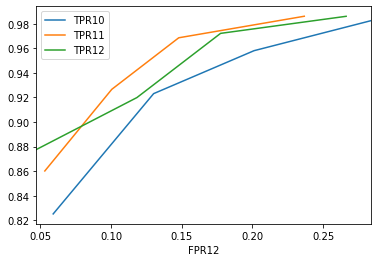

In [641]:
# 3.6 
# Plotting the rates for each threshold and each model to make the ROC curve
ax = df_ft.plot(x = 'FPR10', y = 'TPR10')
b = df_ft.plot(x = 'FPR11', y = 'TPR11', ax=ax)
c = df_ft.plot(x = 'FPR12', y = 'TPR12', ax=ax)

**3.7:**

The figure suggest that TPR11, which is the model that utilized perimeter.mean, texture.se, and fracdim.worst performed the best. It was able to outperformed TPR10 and and TPR12 in most cases as it was able to achieve a higher true positive rate and false positive rate.